In [4]:
import ast 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [7]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Data Analyst,"[go, python, mongodb, mongodb, css, javascript..."
1,Data Scientist,"[sql, python, sql server, oracle, azure, sap]"
2,Data Analyst,NaN
3,Data Engineer,NaN
4,Data Analyst,"[sql, python, jira]"


In [8]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

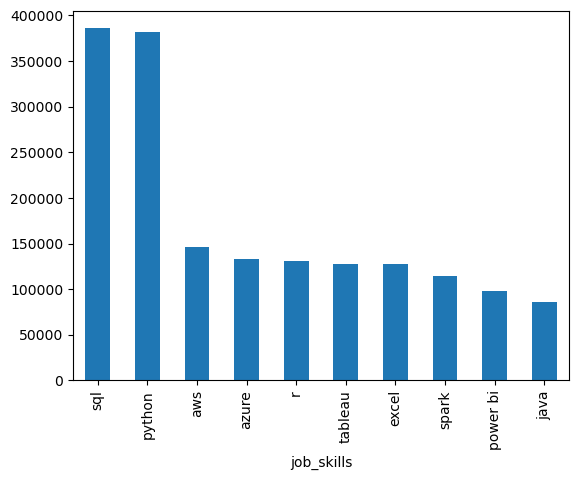

In [12]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [15]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

type(skills_count)

pandas.core.series.Series

In [30]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1067,Data Scientist,python,114016
866,Data Engineer,sql,113375
831,Data Engineer,python,108265
626,Data Analyst,sql,92628
1102,Data Scientist,sql,79174
...,...,...,...
82,Business Analyst,ionic,1
30,Business Analyst,codecommit,1
2242,Software Engineer,visualbasic,1
25,Business Analyst,chainer,1


<Axes: ylabel='job_skills'>

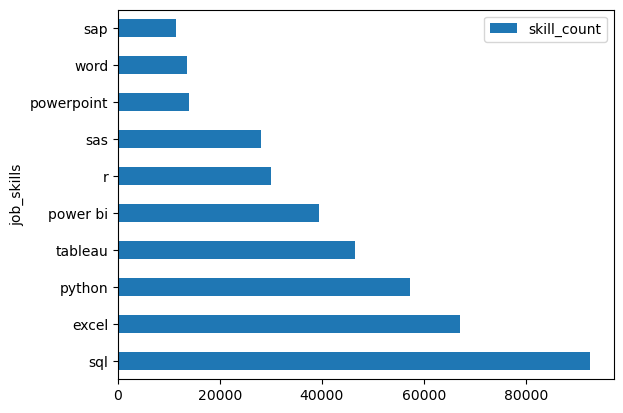

In [34]:
job_title = 'Data Analyst'
top_skills = 10
df_skill_final=df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final.plot(kind='barh',x='job_skills', y='skill_count')

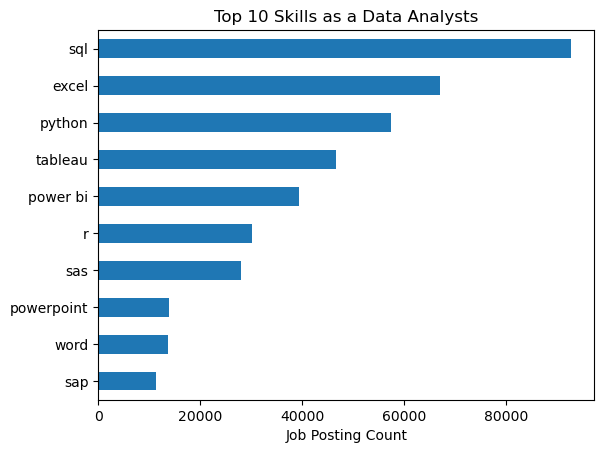

In [38]:
job_title = 'Data Analyst'
top_skills = 10
df_skill_final=df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final.plot(kind='barh',x='job_skills', y='skill_count')
plt.gca().invert_yaxis() #convert the order of the job_skills 
plt.title(f"Top {top_skills} Skills as a {job_title}s")
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()